# <font color=blue><b>Lesson 1: DataFrame basics</b></font>

In [808]:
import pandas as pd

In [809]:
a = pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]}, index=["A", "B"])
a

,Yes,No
A,50,131
B,21,2


In [810]:
b = pd.Series([4, 5], index=["a", "b"], name="Product")
b

a    4
b    5
Name: Product, dtype: int64

# <font color=blue><b>Lesson 2: DataFrame summary - read_csv, describe(), apply, lambda</b></font>

In [910]:
contacts = pd.read_csv("D:/Temp/contacts.csv")

#use contacts.describe() to print descriptive statistics of numeric columns (noten that NaN is treated to be numeric)
#contacts.describe() #all columns
contacts.describe(include=['object']) #only columns with object type
contacts.describe(include=['float']) #only columns with float type

# create a function #or use lambda and ternary form below
def Site_Short(x):
    if x == 'Mulago':
        return 'Mul'
    if x == 'MKC':
        return 'MKC'

# apply the function to the gender column and create a new column
#contacts['Site_New'] = contacts['Site'].apply(Site_Short)

#lambda: anonymous one-line function
contacts['Site_New'] = contacts['Site'].apply(lambda x: 'MUL' if x=='Mulago' else ('MKC' if x=='MKC' else ''))

contacts.head(7)


,Staff Name,Department,Section,Site,Project Name,Site_New
0,Akampulira Andrew,Research,ASTRO/D4T,Mulago,NaN,MUL
1,Ahimbisibwe Cynthia,Research,ASTRO/D4T,Mulago,NaN,MUL
2,Ndyetukira Jane,Research,ASTRO/D4T,Mulago,NaN,MUL
3,Kiiza Taddeo,Research,ASTRO/D4T,Mulago,NaN,MUL
4,Nakijoba Ritah,Research,SOUTH/RHINOS,Mulago,NaN,MUL
5,Eberhard Nadia,Research,SOUTH/RHINOS,Mulago,NaN,MUL
6,Gum Isaac,Research,Research,Mulago,NaN,MUL


# <font color=blue><b>Lesson 3: DataFrame shape, iloc, loc</b></font>

In [812]:
contacts.shape #dimensions


(515, 6)

In [1008]:
contacts.Section.head() #dot notation
contacts['Section'].head() #array notation??


0       ASTRO/D4T
1       ASTRO/D4T
2       ASTRO/D4T
3       ASTRO/D4T
4    SOUTH/RHINOS
Name: Section, dtype: object

In [814]:
contacts['Section'].head()

0       ASTRO/D4T
1       ASTRO/D4T
2       ASTRO/D4T
3       ASTRO/D4T
4    SOUTH/RHINOS
Name: Section, dtype: object

In [815]:
#Difference between loc (label-based selection) and iloc (integer-based selection) 
#iloc in Python. You can use iloc in Python for selection. It is integer-location based and helps you select by the position. ...
#loc in Pandas. You can use loc in Pandas to access multiple rows and columns by using labels; however, you can use it with a boolean array as well (for filtering rows by a condition). 

contacts.iloc[:10, [0,4]].head()

,Staff Name,Project Name
0,Akampulira Andrew,NaN
1,Ahimbisibwe Cynthia,NaN
2,Ndyetukira Jane,NaN
3,Kiiza Taddeo,NaN
4,Nakijoba Ritah,NaN


In [816]:
contacts.iloc[-10:, [0, 2, -2, -1]].head()

,Staff Name,Section,Project Name,Site_New
505,Akullo Joan,Ugandan Academy,NaN,MKC
506,Werikhe Allan,Ugandan Academy,NaN,MKC
507,Musirike Conelius,Finance,NaN,MKC
508,Byonanebye Dathan,Ugandan Academy,NaN,MKC
509,Asibo Veronica Hope,Ugandan Academy,NaN,MKC


In [817]:
contacts.loc[:, ["Section", "Site"]].head()

,Section,Site
0,ASTRO/D4T,Mulago
1,ASTRO/D4T,Mulago
2,ASTRO/D4T,Mulago
3,ASTRO/D4T,Mulago
4,SOUTH/RHINOS,Mulago


In [1047]:
#display Site, Department and Section for rows that pass the condition - very good for filtering
#to negate condition, use ~, eg "not in"  would be ~contacts.Department.isin(['SPDT', 'Training'])
#contacts.loc[(contacts.Site == 'MKC') & (contacts.Department.isin(['SPDT', 'Training'])) & (contacts['Project Name'].notnull()), ['Site']]
contacts.loc[(contacts.Site == 'MKC') & (contacts.Department.isin(['SPDT', 'Training'])), ['Site', 'Department', 'Section']]



,Site,Department,Section
233,MKC,SPDT,SPDT
235,MKC,SPDT,SPDT
239,MKC,SPDT,SPDT
242,MKC,SPDT,SPDT
245,MKC,SPDT,SPDT
247,MKC,SPDT,SPDT
248,MKC,SPDT,SPDT
254,MKC,SPDT,SPDT
256,MKC,SPDT,SPDT
257,MKC,SPDT,SPDT


# <font color=blue><b>Lesson 4: DataFrame groupby</b></font>

In [819]:
contacts.groupby('Site').Section.min()

Site
MKC            ATIC
Mulago    ASTRO/D4T
Name: Section, dtype: object

In [1160]:
#contacts.groupby(['Department']).Department.value_counts()
contacts.groupby(['Department']).salary.sum()/contacts.Department.value_counts().sort_values(ascending = False)


ED's Office               5.0
Finance and Admin         5.0
GHS Project               5.0
IDI Core Lab              5.0
Information Services      5.0
Outreach                  5.0
PCT                       5.0
Professor in Residence    5.0
Research                  5.0
SPDT                      5.0
Ugandan Academy           5.0
Z-Other                   5.0
dtype: float64

In [1155]:
#contacts.groupby(['Section', 'Site']).apply(lambda df: df.iloc[0]).head(20)
contacts.groupby(['Section', 'Site']).apply(lambda df: df.salary.iloc[0]).head(20)


Section               Site  
ASTRO-D4T             Mulago    5.0
Clinical Services     Mulago    5.0
Data Management       MKC       5.0
                      Mulago    5.0
DataFax               MKC       5.0
                      Mulago    5.0
ED's Office           MKC       5.0
Facilities            Mulago    5.0
Finance               MKC       5.0
GHS Project           MKC       5.0
                      Mulago    5.0
H2U                   Mulago    5.0
HR                    MKC       5.0
IDI Core Lab          Mulago    5.0
IT                    MKC       5.0
                      Mulago    5.0
IeDEA                 Mulago    5.0
Information Services  MKC       5.0
                      Mulago    5.0
Library               MKC       5.0
dtype: float64

In [868]:
#for each Department, show pecentage by Site
#contacts.groupby(['Department', 'Site']).Site.agg('count')
site_dept_count = contacts.groupby(['Department', 'Site']).agg({'Site': 'count'})
dept_count = contacts.groupby(['Department']).agg('count')

# divide the gender_ocup per the occup_count and multiply per 100
dept_site = site_dept_count.div(dept_count, level = "Department") * 100

# present all rows from the 'site column'
dept_site.loc[:, 'Site']

Department              Site  
ED's Office             MKC       100.000000
Finance and Admin       MKC        91.489362
                        Mulago      8.510638
GHS Project             MKC        90.909091
                        Mulago      9.090909
IDI Core Lab            Mulago    100.000000
Information Services    MKC        70.833333
                        Mulago     29.166667
Outreach                MKC        95.454545
                        Mulago      4.545455
PCT                     MKC         2.352941
                        Mulago     97.647059
Professor in Residence  Mulago    100.000000
Research                MKC         9.259259
                        Mulago     90.740741
SPDT                    MKC       100.000000
Training                MKC       100.000000
Ugandan Academy         MKC        96.000000
                        Mulago      4.000000
Z-Other                 MKC        50.000000
                        Mulago     50.000000
Name: Site, dtype: float

In [822]:
#contacts = pd.read_csv("D:/Temp/contacts.csv")


In [1161]:
contacts['salary']=5
contacts['Section']=contacts['Section'].str.replace('/', '-') #use .str.replace to replace the whole field
contacts['date_created']='2021-02-08'

In [1162]:
contacts.head()

,Staff Name,Department,Section,Site,Project Name,Site_New,Distance,AllColumns,Column Total,salary,date_created
0,Akampulira Andrew,Research,ASTRO-D4T,Mulago,NaN,MUL,110.0,Akampulira Andrew Research ASTRO-D4T Mulago MU...,115.0,5,2021-02-08
1,Ahimbisibwe Cynthia,Research,ASTRO-D4T,Mulago,NaN,MUL,110.0,Ahimbisibwe Cynthia Research ASTRO-D4T Mulago ...,115.0,5,2021-02-08
2,Ndyetukira Jane,Research,ASTRO-D4T,Mulago,NaN,MUL,110.0,Ndyetukira Jane Research ASTRO-D4T Mulago MUL ...,115.0,5,2021-02-08
3,Kiiza Taddeo,Research,ASTRO-D4T,Mulago,NaN,MUL,110.0,Kiiza Taddeo Research ASTRO-D4T Mulago MUL 110...,115.0,5,2021-02-08
4,Nakijoba Ritah,Research,SOUTH-RHINOS,Mulago,NaN,MUL,110.0,Nakijoba Ritah Research SOUTH-RHINOS Mulago MU...,115.0,5,2021-02-08


In [1163]:
contacts.mean()

Project Name      0.000000
Distance        335.365854
Column Total    345.345528
salary            5.000000
dtype: float64

In [1164]:
contacts.groupby(['Site', 'Section']).salary.sum()

Site    Section             
MKC     Data Management          25
        DataFax                  25
        ED's Office              50
        Finance                 215
        GHS Project             100
        HR                       60
        IT                       25
        Information Services      5
        Library                  10
        Operations               95
        Outreach                300
        Procurement              45
        Research                 20
        SPDT                    120
        Stores                   10
        System Dev.              20
        TBDRC                     5
        Ugandan Academy         120
        Z-Other                  25
        \N                       20
Mulago  ASTRO-D4T                60
        Clinical Services       275
        Data Management           5
        DataFax                  15
        Facilities               15
        GHS Project              10
        H2U                      30

In [1167]:
#idxmin - by default, it returns the index for the minimum value in each column
contacts.groupby(['Site', 'Section']).apply(lambda df: df.loc[df.salary.idxmin()]) #least paid in each Site/Section
#contacts.groupby(['Site', 'Section']).apply(lambda df: df) #list all

Staff Name  \
Site   Section                                           
MKC    Data Management                Nankwenda Hanifa   
       DataFax                          Ndawula Harold   
       ED's Office                         Eilbert Kay   
       Finance                         Atuhaire Salome   
       GHS Project            Wanjala Wanyonyi Bernard   
       HR                                 Menya Hassan   
       IT                                  Odoa Mawazi   
       Information Services           Wambede Ramothan   
       Library                         Ssenono Richard   
       Operations                         Ndagire Tina   
       Outreach                          Akiju Faridah   
       Procurement                   Kisakye Priscilla   
       Research                            Irumba Paul   
       SPDT                                Kakaire Tom   
       Stores                           Mawanda Clovis   
       System Dev.           Katongole Kayaga Maimouna   
       TBDRC                        Nakabugo Elizabeth   
       Ugandan Academy                   Lubega Flavia   
       Z-Other                        Bamwesiga Reagan   
       \N                           Mbabazi Immaculate   
Mulago ASTRO-D4T                     Akampulira Andrew   
       Clinical Services                Namugwe Zuhura   
       Data Management                     Madina Sera   
       DataFax                            Agwang Betty   
       Facilities                       Tigasitwa Fred   
       GHS Project                    Lamorde Mohammed   
       H2U                                  Obed Yusuf   
       IDI Core Lab                        Omali Denis   
       IT                                  Onen Edward   
       IeDEA                            Achieng Marion   
       Information Services              Orama Richard   
       Library                      Jopaowitt Rosemary   
       Operations                        Makwasi Moses   
       Outreach                Mirembe Bukira Rossette   
       PIR                                 Manabe Yuka   
       Pharmacy                        Weikama Ambrose   
       QA-QC                               Kalule Ivan   
       Records                        Kabajjo Fredrick   
       Research                              Gum Isaac   
       SHARE                   Sekiziyivu Brian Arthur   
       SOUTH-RHINOS                     Nakijoba Ritah   
       SRH                               Mackline Hope   
       Stat Lab                           Babirye Dora   
       Statistics                      Banturaki Grace   
       TB research                       Matovu Joshua   
       TBDRC                            Kabanda Wyclef   
       Ugandan Academy               Akirana Josephine   
       \N                               Mutonyi Gloria   

                                         Department               Section  \
Site   Section                                                              
MKC    Data Management         Information Services       Data Management   
       DataFax                             Research               DataFax   
       ED's Office                      ED's Office           ED's Office   
       Finance                    Finance and Admin               Finance   
       GHS Project                      GHS Project           GHS Project   
       HR                         Finance and Admin                    HR   
       IT                      Information Services                    IT   
       Information Services    Information Services  Information Services   
       Library                 Information Services               Library   
       Operations                 Finance and Admin            Operations   
       Outreach                            Outreach              Outreach   
       Procurement                Finance and Admin           Procurement   
       Research                            Research              

In [1168]:
contacts.groupby(['Site', 'Department']).apply(lambda df: df.loc[df.salary.idxmax()])

Staff Name  \
Site   Department                                          
MKC    ED's Office                           Eilbert Kay   
       Finance and Admin               Kisakye Priscilla   
       GHS Project              Wanjala Wanyonyi Bernard   
       Information Services    Katongole Kayaga Maimouna   
       Outreach                            Akiju Faridah   
       PCT                               Bulwadda Daniel   
       Research                              Irumba Paul   
       SPDT                                  Kakaire Tom   
       Ugandan Academy                     Lubega Flavia   
       Z-Other                         Kabanyoro Lillian   
Mulago Finance and Admin                   Makwasi Moses   
       GHS Project                      Lamorde Mohammed   
       IDI Core Lab                          Omali Denis   
       Information Services                Orama Richard   
       Outreach                  Mirembe Bukira Rossette   
       PCT                                 Kabuye Ronald   
       Professor in Residence                Manabe Yuka   
       Research                        Akampulira Andrew   
       Ugandan Academy                 Akirana Josephine   
       Z-Other                            Mutonyi Gloria   

                                           Department               Section  \
Site   Department                                                             
MKC    ED's Office                        ED's Office           ED's Office   
       Finance and Admin            Finance and Admin           Procurement   
       GHS Project                        GHS Project           GHS Project   
       Information Services      Information Services           System Dev.   
       Outreach                              Outreach              Outreach   
       PCT                                        PCT           GHS Project   
       Research                              Research              Research   
       SPDT                                      SPDT                  SPDT   
       Ugandan Academy                Ugandan Academy       Ugandan Academy   
       Z-Other                                Z-Other               Z-Other   
Mulago Finance and Admin            Finance and Admin            Operations   
       GHS Project                        GHS Project           GHS Project   
       IDI Core Lab                      IDI Core Lab          IDI Core Lab   
       Information Services      Information Services  Information Services   
       Outreach                              Outreach              Outreach   
       PCT                                        PCT             ASTRO-D4T   
       Professor in Residence  Professor in Residence                   PIR   
       Research                              Research             ASTRO-D4T   
       Ugandan Academy                Ugandan Academy       Ugandan Academy   
       Z-Other                                Z-Other                    \N   

                                 Site  Project Name Site_New  Distance  \
Site   Department                                                        
MKC    ED's Office                MKC           NaN      MKC     220.0   
       Finance and Admin          MKC           NaN      MKC     220.0   
       GHS Project                MKC           NaN      MKC     220.0   
       Information Services       MKC           NaN      MKC     220.0   
       Outreach                   MKC           NaN      MKC     220.0   
       PCT                        MKC           NaN      MKC     220.0   
       Research                   MKC           NaN      MKC     220.0   
       SPDT                       MKC           NaN      MKC     220.0   
       Ugandan Academy            MKC           NaN      MKC     220.0   
       Z-Other                    MKC           NaN      MKC     220.0   
Mulago Finance and Admin       Mulago           NaN      MUL     110.0   
       GHS Project      

In [1169]:
contacts.groupby(['Site', 'Department']).apply(lambda df: df.loc[df.salary.idxmax()]).sort_values(by=['Section', 'Staff Name'], ascending=False, na_position='first')

Staff Name  \
Site   Department                                          
Mulago Z-Other                            Mutonyi Gloria   
MKC    Z-Other                         Kabanyoro Lillian   
       Ugandan Academy                     Lubega Flavia   
Mulago Ugandan Academy                 Akirana Josephine   
MKC    Information Services    Katongole Kayaga Maimouna   
       SPDT                                  Kakaire Tom   
       Research                              Irumba Paul   
       Finance and Admin               Kisakye Priscilla   
Mulago Professor in Residence                Manabe Yuka   
       Outreach                  Mirembe Bukira Rossette   
MKC    Outreach                            Akiju Faridah   
Mulago Finance and Admin                   Makwasi Moses   
       Information Services                Orama Richard   
       IDI Core Lab                          Omali Denis   
MKC    GHS Project              Wanjala Wanyonyi Bernard   
Mulago GHS Project                      Lamorde Mohammed   
MKC    PCT                               Bulwadda Daniel   
       ED's Office                           Eilbert Kay   
Mulago PCT                                 Kabuye Ronald   
       Research                        Akampulira Andrew   

                                           Department               Section  \
Site   Department                                                             
Mulago Z-Other                                Z-Other                    \N   
MKC    Z-Other                                Z-Other               Z-Other   
       Ugandan Academy                Ugandan Academy       Ugandan Academy   
Mulago Ugandan Academy                Ugandan Academy       Ugandan Academy   
MKC    Information Services      Information Services           System Dev.   
       SPDT                                      SPDT                  SPDT   
       Research                              Research              Research   
       Finance and Admin            Finance and Admin           Procurement   
Mulago Professor in Residence  Professor in Residence                   PIR   
       Outreach                              Outreach              Outreach   
MKC    Outreach                              Outreach              Outreach   
Mulago Finance and Admin            Finance and Admin            Operations   
       Information Services      Information Services  Information Services   
       IDI Core Lab                      IDI Core Lab          IDI Core Lab   
MKC    GHS Project                        GHS Project           GHS Project   
Mulago GHS Project                        GHS Project           GHS Project   
MKC    PCT                                        PCT           GHS Project   
       ED's Office                        ED's Office           ED's Office   
Mulago PCT                                        PCT             ASTRO-D4T   
       Research                              Research             ASTRO-D4T   

                                 Site  Project Name Site_New  Distance  \
Site   Department                                                        
Mulago Z-Other                 Mulago           NaN      MUL     110.0   
MKC    Z-Other                    MKC           NaN      MKC     220.0   
       Ugandan Academy            MKC           NaN      MKC     220.0   
Mulago Ugandan Academy         Mulago           NaN      MUL     110.0   
MKC    Information Services       MKC           NaN      MKC     220.0   
       SPDT                       MKC           NaN      MKC     220.0   
       Research                   MKC           NaN      MKC     220.0   
       Finance and Admin          MKC           NaN      MKC     220.0   
Mulago Professor in Residence  Mulago           NaN      MUL     110.0   
       Outreach                Mulago           NaN      MUL     110.0   
MKC    Outreach                   MKC           NaN      MKC     220.0   
Mulago Finance and Admin

In [1170]:
contacts.groupby(['Site', 'Department']).salary.agg(['sum', 'mean', 'median', 'count']) #.salary.sum() #.salary.agg([sum]) #(by='Section', key=lambda col: col.str.lower())

sum  mean  median  count
Site   Department                                      
MKC    ED's Office              50     5       5     10
       Finance and Admin       430     5       5     86
       GHS Project             100     5       5     20
       Information Services     85     5       5     17
       Outreach                315     5       5     63
       PCT                      10     5       5      2
       Research                 50     5       5     10
       SPDT                    120     5       5     24
       Ugandan Academy         120     5       5     24
       Z-Other                  15     5       5      3
Mulago Finance and Admin        40     5       5      8
       GHS Project              10     5       5      2
       IDI Core Lab            130     5       5     26
       Information Services     35     5       5      7
       Outreach                 15     5       5      3
       PCT                     415     5       5     83
       Professor in Residence    5     5       5      1
       Research                490     5       5     98
       Ugandan Academy           5     5       5      1
       Z-Other                  15     5       5      3

# <font color=blue><b>Lesson 5: DataFrame column rename, concat, merge</b></font>

In [1184]:
contacts.rename(columns={'salary': 'Salary'}).head()

,Staff Name,Department,Section,Site,Project Name,Site_New,Distance,AllColumns,Column Total,Salary,date_created
0,Akampulira Andrew,Research,ASTRO-D4T,Mulago,NaN,MUL,110.0,Akampulira Andrew Research ASTRO-D4T Mulago MU...,115.0,5,2021-02-08
1,Ahimbisibwe Cynthia,Research,ASTRO-D4T,Mulago,NaN,MUL,110.0,Ahimbisibwe Cynthia Research ASTRO-D4T Mulago ...,115.0,5,2021-02-08
2,Ndyetukira Jane,Research,ASTRO-D4T,Mulago,NaN,MUL,110.0,Ndyetukira Jane Research ASTRO-D4T Mulago MUL ...,115.0,5,2021-02-08
3,Kiiza Taddeo,Research,ASTRO-D4T,Mulago,NaN,MUL,110.0,Kiiza Taddeo Research ASTRO-D4T Mulago MUL 110...,115.0,5,2021-02-08
4,Nakijoba Ritah,Research,SOUTH-RHINOS,Mulago,NaN,MUL,110.0,Nakijoba Ritah Research SOUTH-RHINOS Mulago MU...,115.0,5,2021-02-08


In [832]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
...: 'B': ['B0', 'B1', 'B2', 'B3'],
...: 'C': ['C0', 'C1', 'C2', 'C3'],
...: 'D': ['D0', 'D1', 'D2', 'D3']},
...: index=[0, 1, 2, 3])

In [833]:
df2 = pd.DataFrame({'A': ['A20', 'A21', 'A22', 'A23'],
...: 'B': ['B0', 'B1', 'B2', 'B3'],
...: 'C': ['C0', 'C1', 'C2', 'C3'],
...: 'D': ['D0', 'D1', 'D2', 'D3']},
...: index=[4, 5, 6, 7])

In [834]:
df3 = pd.concat([df1, df2]).drop_duplicates() #can drop duplicates
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A20,B0,C0,D0
5,A21,B1,C1,D1
6,A22,B2,C2,D2
7,A23,B3,C3,D3


In [835]:
df3 = pd.concat([df1, df2], keys=['xx', 'yy'])
df3

A   B   C   D
xx 0   A0  B0  C0  D0
   1   A1  B1  C1  D1
   2   A2  B2  C2  D2
   3   A3  B3  C3  D3
yy 4  A20  B0  C0  D0
   5  A21  B1  C1  D1
   6  A22  B2  C2  D2
   7  A23  B3  C3  D3

In [836]:
df3.loc['yy']

,A,B,C,D
4,A20,B0,C0,D0
5,A21,B1,C1,D1
6,A22,B2,C2,D2
7,A23,B3,C3,D3


In [837]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
...: 'B': ['B0', 'B1', 'B2', 'B3'],
...: 'C': ['C0', 'C1', 'C2', 'C3'],
...: 'D': ['D0', 'D1', 'D2', 'D3']},
...: index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A0', 'A21', 'A22', 'A23'],
...: 'B': ['Bx0', 'B1', 'B2', 'B3'],
...: 'C': ['Cx0', 'C1', 'C2', 'C3'],
...: 'D': ['Dx0', 'D1', 'D2', 'D3']},
...: index=[4, 5, 6, 7])


In [838]:
df3 = pd.merge(df1, df2, on='A', how='left') #, left_index=True, right_index=True,)
df3

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,A0,B0,C0,D0,Bx0,Cx0,Dx0
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN


# <font color=blue><b>Lesson 6: DataFrame matplotlib plot</b></font>

In [839]:
import matplotlib.pyplot as plt
import numpy as np

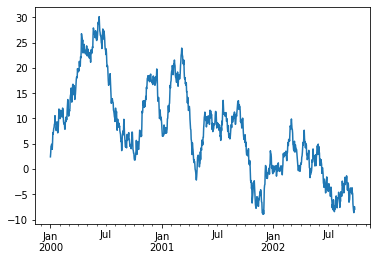

In [840]:
plt.close('all')
ts = pd.Series(np.random.randn(1000),
    index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

ts.plot()

# <font color=blue><b>Lesson 7: Mapping with GeoPandas</b></font>

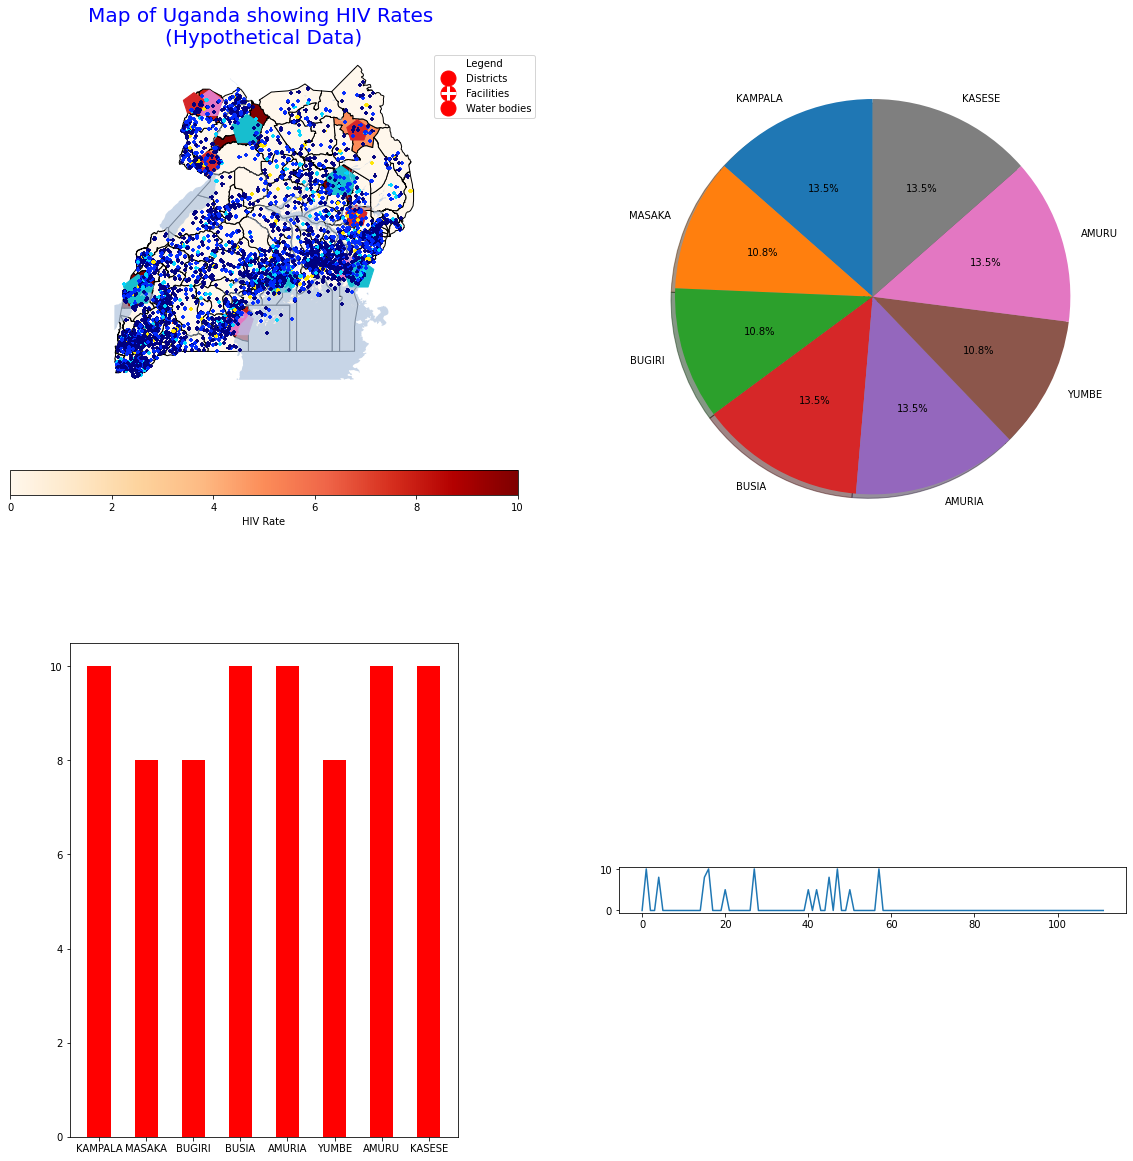

In [877]:
import geopandas as gpd
#import matplotlib.pylpot as plt #already imported up there

#from mpl_toolkits.axes_grid1 import make_axes_locatable

uganda = gpd.read_file('D:/SMC Operational Center/data/Uganda_districts2010.shp')
uganda_lakes_rivers = gpd.read_file('D:/SMC Operational Center/data/Uganda_lakes_rivers2005.shp')

#uganda.plot(cmap='jet', figsize=(10, 10))
#type(uganda)#geopandas.geodataframe.GeoDataFrame
#uganda.crs #see the coordinate reference system

uganda_hiv = pd.read_csv('D:/Temp/Ugands_HIV.csv')
uganda_hiv.fillna(1, inplace=True)
#uganda_hiv[uganda_hiv['hiv_rate'] < 8] = 0
uganda_hiv.loc[(uganda_hiv.hiv_rate < 5), 'hiv_rate'] = 0


uganda_hiv['hiv_notes'] = [str(x*100) + ' people' for x in uganda_hiv['hiv_rate']]


#merge uganda with uganda_hiv
uganda = uganda.merge(uganda_hiv, on='DNAME_2010')
#uganda[uganda['hiv_rate'] < 0] = None


ugandaHF = gpd.read_file('D:/SMC Operational Center/data/UgandaHF.shp')
#ugandaHF.plot(cmap='jet', column='level', figsize=(10, 10))

#fig, ax1 = plt.subplots(1, figsize=(15, 15))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20), subplot_kw=dict(aspect="equal"))

#divider = make_axes_locatable(ax1)

#fig.suptitle('Map of Uganda', fontsize=24, color='blue')
ax1.set_title('Map of Uganda showing HIV Rates \n(Hypothetical Data)', fontsize=20, color='blue')
#ax1.set_xlabel('xlabel')
#ax1.set_ylabel('ylabel')
#ax1.set_axis_off()
#plt.xticks([])
#plt.yticks([])
ax1.set_axis_off()

# Adjust legend location
leg = ax1.get_legend()
#leg.set_bbox_to_anchor((1.15,0.5))

#ax1.set_axis_off()

#ax1.text(0, 0, r'an equation: $E=mc^2$', fontsize=15)

centroids = uganda.copy()
centroids.geometry = uganda.centroid
centroids['size'] = centroids['hiv_rate'] * 100  # to get reasonable plotable number

#uganda.plot(ax=ax1
uganda[uganda['hiv_rate'] >= 0].plot(ax=ax1
            , cmap='OrRd' #'YlOrBr' #'Set1' #'Dark2' #'prism' #'plasma' #'Pastel1'
            #, alpha=0.5
            #, facecolor='k'
            , edgecolor='black'
            , column='hiv_rate'
            , legend=True                                     
            , legend_kwds={'label': "HIV Rate", 'orientation': 'horizontal'}
            #, missing_kwds={
            #    "color": "lightgrey",
            #    "edgecolor": "red",
            #    "hatch": "///",
            #    "label": "Missing values"
            #}
            , linewidth=1
            , zorder=0                                     
)

centroids.plot(ax=ax1, column='hiv_rate', legend=True, categorical=True, legend_kwds={}, marker='p', markersize='size')

#uganda.boundary.plot(ax=ax1)
#uganda.apply(lambda x: ax1.annotate(s=x.DNAME_2010, xy=x.geometry.centroid.coords[0], ha='left', fontsize=6, color='black', horizontalalignment='right', verticalalignment='center', textcoords='data'),axis=1)
uganda_lakes_rivers.plot(ax=ax1, color='lightsteelblue', legend=True, alpha=0.7)
ugandaHF.plot(ax=ax1, cmap='jet', marker='P', markersize=10, column='level', legend=True, categorical=True, zorder=1)
#ax1.plot(activity, dog, label="dog")
#ax1.plot(activity, cat, label="cat")
#ax1.set_label('Label via method')
#ax1.legend()


ax1.legend([red_dot, (red_dot, white_cross), red_dot], ['Districts', 'Facilities', 'Water bodies'],
          title="Legend",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#ax1.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])


#legend_elements =[]
#ax1.legend(handles=legend_elements, loc='lower right', fontsize=20, title_fontsize=20);


#uganda[uganda['hiv_rate'] >= 0].bar(ax=ax2)
ax2.pie(uganda.loc[(uganda.hiv_rate > 5), 'hiv_rate'], labels=uganda.loc[(uganda.hiv_rate > 5), 'DNAME_2010'], autopct='%1.1f%%', shadow=True, startangle=90)
#ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax3.bar(uganda.loc[(uganda.hiv_rate > 5), 'DNAME_2010'], uganda.loc[(uganda.hiv_rate > 5), 'hiv_rate'] , 0.5, color='r')
ax4.plot(uganda.loc[(uganda.hiv_rate > 5), 'DNAME_2010'], uganda.loc[(uganda.hiv_rate > 5), 'hiv_rate'] , 0.5, color='b')
#ax4.plot(uganda['hiv_rate'])

#ax1.legend(['xx1', 'xx2'])
#ax2.set_axis_off()

# Create a output path for the data
out = r"D:/Temp/GeoPandas/uganda.shp"
# Select first 50 rows
selection = uganda[0:50] #uganda #uganda[0:50]
# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out)

#plt.figure(dpi=4000)
plt.savefig('D:/Temp/uganda.png', dpi=200) 

uganda_html = uganda.to_html(index_names=False) #to html table


# <font color=blue><b>Lesson 8: Pie charts</b></font>

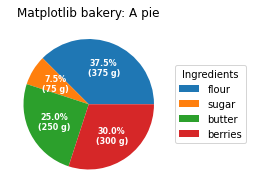

In [902]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

#Adding wedgeprops=dict(width=0.5) changes the pie into donut
#wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.5), autopct=lambda pct: func(pct, data),
#                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

# <font color=blue><b>Lesson 9: Donut charts - just another piechart by adding wedgeprops</b></font>

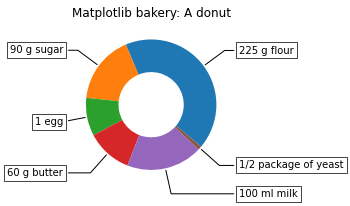

In [899]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

# <font color=blue><b>Lesson 10: Reading from Database, dropping columns, frequency counts</b></font>

In [906]:
from sqlalchemy import create_engine
import pymysql #install case-sensitively using: pip install PyMySQL
#sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1', pool_recycle=3600)

dbConnection = pymysql.connect(host='localhost', port=3306, user='grails', password='server', db='nomad')
equipment = pd.read_sql("select * from nomad.equipment", dbConnection);


good_columns = equipment._get_numeric_data().dropna(axis=1) #remove columns with non-numeric and missing values (NA, Nan, etc)

#good_columns.shape #(556, 6)
#equipment.shape #(556, 19)

#equipment['recommended_health_center2'].unique()
#equipment.date_created.value_counts() #frequency counts
#equipment['date_created'].value_counts() #frequency counts
#equipment

2016-07-05 00:00:00    555
2016-05-14 10:43:36      1
Name: date_created, dtype: int64

# <font color=blue><b>Lesson 11: Counting missing values</b></font>

In [882]:
equipment.fillna(equipment.mean(), inplace=True)
equipment.dtypes

# Define function
def missing(x):
    return sum(x.isnull())

# Apply per row
print('Missing values per row')
equipment.apply(missing, axis = 1) #.head()

# Apply per column
print('Missing values per column')
equipment.apply(missing, axis = 0) #.head()


Missing values per row
Missing values per column


id                                        0
version                                   0
current_holder_id                         0
current_status                            0
date_created                              0
last_updated                              0
last_updated_by                           0
notes                                     1
owner_id                                  0
recommended_general_hospital              0
recommended_health_center2                0
recommended_health_center3                0
recommended_health_center4                0
recommended_national_referral_hospital    0
recommended_regional_referral_hospital    0
record_code                               0
record_name                               0
url                                       1
unit_cost                                 0
dtype: int64

In [846]:
equipment.head(2)

,id,version,current_holder_id,current_status,date_created,last_updated,last_updated_by,notes,owner_id,recommended_general_hospital,recommended_health_center2,recommended_health_center3,recommended_health_center4,recommended_national_referral_hospital,recommended_regional_referral_hospital,record_code,record_name,url,unit_cost
0,1,1,1,1,2016-07-05,2016-07-05,1,,1,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0001,Abduction Pillows,,450.000000
1,2,1,1,1,2016-07-05,2016-07-05,1,,1,5.166667,0.162162,0.540541,1.220721,492.608108,9.988739,0002,Adjustable Pipe Wrench,\r,42399.481982


# <font color=blue><b>Lesson 12: Data exploration - seaborn</b></font>

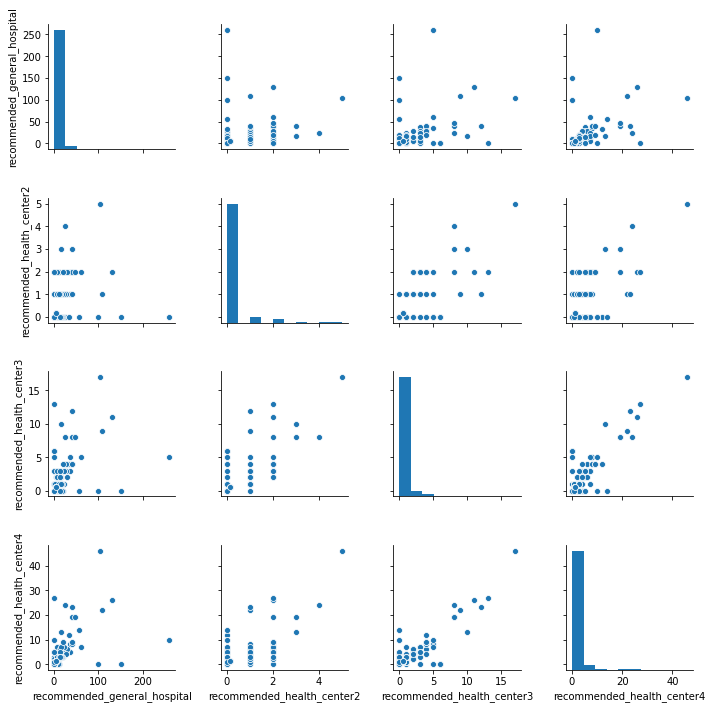

In [847]:
#data exploration - see correlation among then different variables
import seaborn as sns
#import matplotlib.pyplot as plt
sns.pairplot(equipment[["recommended_general_hospital", "recommended_health_center2", "recommended_health_center3", "recommended_health_center4"]])
plt.show()

# <font color=blue><b>Lesson 13: Machine learning - KMeans</b></font>

In [848]:
from sklearn.cluster import KMeans #the main Python machine learning package, scikit-learn
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = equipment._get_numeric_data().dropna(axis=1) #remove columns with non-numeric and missing values (NA, Nan, etc)
kmeans_model.fit(good_columns) #fit a k-means clustering model
labels = kmeans_model.labels_ #and get our cluster labels

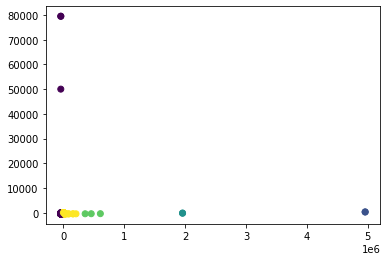

In [849]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [850]:
# Splitting Data into Training and Testing Sets
# for supervised machine learning, it’s a good idea to split the data into training and testing sets so we don’t overfit

train = equipment.sample(frac=0.8, random_state=1) #returns size (445, 19)
test = equipment.loc[~equipment.index.isin(train.index)] #returns size (111, 19)



# <font color=blue><b>Lesson 14: Machine learning - Linear Regression</b></font>

In [851]:
# Univariate Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[["recommended_health_center2"]], train["recommended_health_center3"])
predictions = lr.predict(test[["recommended_health_center2"]])

In [852]:
# Calculating Summary Statistics for the Model
import statsmodels.formula.api as sm
model = sm.ols(formula='recommended_health_center3 ~ recommended_health_center2', data=train)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     recommended_health_center3   R-squared:                       0.677
Model:                                    OLS   Adj. R-squared:                  0.676
Method:                         Least Squares   F-statistic:                     928.7
Date:                        Fri, 05 Feb 2021   Prob (F-statistic):          8.68e-111
Time:                                11:34:55   Log-Likelihood:                -527.74
No. Observations:                         445   AIC:                             1059.
Df Residuals:                             443   BIC:                             1068.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.1002      0.040      2.530      0.012       0.022       0.178
recommended_health_center2     2.3014      0.076     30.474      0.000       2.153       2.450
==============================================================================
Omnibus:                      430.902   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17038.956
Skew:                           4.155   Prob(JB):                         0.00
Kurtosis:                      32.153   Cond. No.                         2.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color=blue><b>Lesson 15: Machine learning - Random Forest</b></font>

In [853]:
# Fit a random forest model
from sklearn.ensemble import RandomForestRegressor
predictor_columns = ["recommended_health_center2", "recommended_health_center4", "recommended_general_hospital"]
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(train[predictor_columns], train["recommended_health_center3"])
predictions = rf.predict(test[predictor_columns])

In [854]:
# Calculating Error
# Now that we’ve fit two models, let’s calculate error in R and Python. We’ll use MSE.

from sklearn.metrics import mean_squared_error
mean_squared_error(test["recommended_health_center3"], predictions)

1.33817645728021

# <font color=blue><b>Lesson 16: Machine learning - Web scraping</b></font>

In [855]:
# web scraping
# import requests # The requests library will make a GET request to a web server, which will download the HTML contents of a given web page for us. There are several different types of requests we can make using requests, of which GET is just one
url = "http://www.basketball-reference.com/boxscores/201506140GSW.html"
data = requests.get(url).content
data

b'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" itemscope itemtype="https://schema.org/WebSite" lang="en" class="no-js" >\n<head>\n<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n<script type="text/javascript" async=true>\n    (function() {\n\tvar host = window.location.hostname;\n\tvar element = document.createElement(\'script\');\n\tvar firstScript = document.getElementsByTagName(\'script\')[0];\n\tvar url = \'https://quantcast.mgr.consensu.org\'\n\t    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \'/choice.js\')\n\tvar uspTries = 0;\n\tvar uspTriesLimit = 3;\n\telement.async = true;\n\telement.type = \'text/javascript\';\n\telement.src = url;\n\t\n\tfirstScript.parentNode.insertBefore(element, firstScript);\n\t\n\tfunction makeStub() {\n\t    var TCF_LOCATOR_NAME = \'__tcfapiLocator\';\n\t    var queue = [];\n\t    var win = window;\n\t    var cmpFrame;\n\t    \n\t    function addFrame() {\n\t\tvar doc = win.document;\n\t\tva

In [856]:
from bs4 import BeautifulSoup
soup.prettify()
list(soup.children)
[type(item) for item in list(soup.children)] #list-comprehension, concise way to create new lists
html = list(soup.children)[1] #html is element 3 in list(soup.children)

soup = BeautifulSoup(data, 'html.parser')
soup.find_all('p')
soup.find_all('table') #[0].get_text()
len(soup.find_all('tr'))


272

In [857]:
from bs4 import BeautifulSoup # we use BeautifulSoup, the most commonly used web scraping package
import re
soup = BeautifulSoup(data, 'html.parser')
box_scores = []
for tag in soup.find_all(id=re.compile("[A-Z]{3,}_basic")):
    rows = []
    for i, row in enumerate(tag.find_all("tr")):
        if i == 0:
            continue
        elif i == 1:
            tag = "th"
        else:
            tag = "td"
        row_data = [item.get_text() for item in row.find_all(tag)] #list comprehension
        rows.append(row_data)
        box_scores.append(rows)
        
box_scores



[]

In [858]:
#import requests
#from bs4 import BeautifulSoup
import random
 
text = 'python'
url = 'https://google.com/search?q=' + text
A = ("Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36",
       "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36",
       "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36",
       )
 
Agent = A[random.randrange(len(A))]
 
headers = {'user-agent': Agent}
r = requests.get(url, headers=headers)
 
soup = BeautifulSoup(r.text, 'lxml') #The ‘lxml‘ package must be installed for the below code to work.
for info in soup.find_all('h3'):
    print(info.text)
    print('#######')

r.content
#soup.find_all('h3')    

b'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html>\n<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://www.google.com/search?q=python</title></head>\n<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;" onload="e=document.getElementById(\'captcha\');if(e){e.focus();}">\n<div style="max-width:400px;">\n<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>\n<form id="captcha-form" action="index" method="post">\n<script src="https://www.google.com/recaptcha/api.js" async defer></script>\n<script>var submitCallback = function(response) {document.getElementById(\'captcha-form\').submit();};</script>\n<div id="recaptcha" class="g-recaptcha" data-sitekey="6LfwuyUTAAAAAOAmoS0fdqijC2PbbdH4kjq62Y1b" data-callback="submitCallback" data-s="eyzv7AydNy1oPSdkqNoHYSKpVUA5yZXu94jjcb2cnYVGk1O9xvOaelB1xpEjVPCFc8BhVpCvJ_uajfc

In [859]:
xx='$123457'
#float(xx[1:4])
float(xx.replace('$', ''))

123457.0

# <font color=blue><b>Lesson 17: Apply, drop, filter, lambda</b></font>

In [1110]:
#contacts
#contacts[ #-2:, :3] #not work

#apply is used to apply a function along an axis of the DataFrame.

contacts['AllColumns'] = contacts[contacts.columns[0:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

contacts.loc['Row Total'] = contacts.loc[:,'Column Total'] = 0
contacts.loc['Row Total'] = contacts.sum(numeric_only=True, axis=0)
contacts.loc[:,'Column Total'] = contacts.sum(numeric_only=True, axis=1)
#contacts.loc['Row Total'].fillna('xxx')
#contacts.loc['Row Total'].isnull().values.any()
#contacts.loc[:,'Column Total'].isnull().values.any()

#drop columns
#contacts.drop(columns=['Column1', 'Column2'], inplace=True)

#drop row by index
#contacts.drop(['Row1'], inplace=True) #inplace=True is same as assigning df=df.drop()...

#drop all rows with Department equals Training
contacts.drop(contacts[contacts['Department'] == 'Training'].index, inplace = True) 
contacts['Department'].unique()
#could have used vectorization operation: contacts[contacts['Department'] != 'Training'] to achieve the same filtering

contacts[contacts['Department'] != 'Training'].loc[:, 'Site'] #display Site only


#contacts.groupby(["Department", "Section"]).sum() #displays totals only
#contacts.groupby(["Department", "Section"]).apply(lambda df: df.loc[df.salary.idxmin()])
grouped = contacts.groupby(["Department", "Section"])

#for name,group in grouped:
#for name,group in grouped:
#    print (name)
#    print (group)

#print (grouped.get_group("ED's Office", "ED's Office"))

#print (grouped['salary'].agg([np.mean, np.median, np.sum]))

grouped.filter(lambda x: len(x) >= 60)

#contacts.Salary.filter(lambda x: len(x) >= 60) #not work

#contacts.dtypes #returns a series with data type of each column


# TO convert the date to datetime64 
contacts['date_created'] = pd.to_datetime(contacts['date_created'], format='%Y-%m-%d') 
  
# Filter data between two dates using query function
filtered_df = contacts.query("date_created == '2020-02-08' and date_created == '2021-02-08'") 
filtered_df

#filtered_df1 = contacts.query('Site == "MKC" or Department == "PCT"') #.query("Department.isin(['SPDT', 'Training'])") 
#filtered_df1.loc[:, ['Department', 'Site', 'AllColumns']]
filtered_df1 = contacts.query('Site == "MKC" or Department == "PCT"').loc[:, ['Department', 'Site', 'AllColumns']]
filtered_df1.loc[contacts.Site == 'MKC', 'Department']


232    Finance and Admin
233                 SPDT
234          GHS Project
235                 SPDT
236    Finance and Admin
237    Finance and Admin
238    Finance and Admin
239                 SPDT
240    Finance and Admin
241    Finance and Admin
242                 SPDT
243    Finance and Admin
244          GHS Project
245                 SPDT
246    Finance and Admin
247                 SPDT
248                 SPDT
249    Finance and Admin
250             Research
251      Ugandan Academy
252      Ugandan Academy
253      Ugandan Academy
254                 SPDT
255      Ugandan Academy
256                 SPDT
257                 SPDT
258                 SPDT
259                 SPDT
260                 SPDT
261    Finance and Admin
             ...        
485             Research
486    Finance and Admin
487              Z-Other
488             Outreach
489      Ugandan Academy
490          GHS Project
491             Outreach
492    Finance and Admin
493             Outreach


# <font color=blue><b>Lesson 18: Reading from Excel, reset index, drop na</b></font>

In [965]:
staffpickup = pd.ExcelFile("D:\Temp\staffpickup.xlsx")
staffpickup = staffpickup.parse("March-2020", header=3) #[2:].reset_index()
staffpickup.head()


,FIRST NAME,SECOND NAME,DEPARTMENT,PLACE OF STAY,FINAL DESTINATION,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Phoebe,Nakamatte,Training,Gayaza,MKC,NaN
2,Paul,Oboth,MAPD,Kiriynya Bweyogerere,MKC,NaN
3,Pius,Etam,MAPD,Kasangati,MKC,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [966]:
#staffpickup.dropna() #Drop the rows where at least one element is missing.
#staffpickup.dropna(axis='columns') #Drop the columns where at least one element is missing.
#staffpickup.drop(columns=['index'], inplace=True)
staffpickup.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True) #drop rows with all values missing 
#staffpickup.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True) #drop rows with all values missing 
staffpickup.drop(columns=['Unnamed: 5'], inplace=True)
staffpickup.reset_index(drop=True, inplace=True) #drop existing index
staffpickup

,FIRST NAME,SECOND NAME,DEPARTMENT,PLACE OF STAY,FINAL DESTINATION
0,Phoebe,Nakamatte,Training,Gayaza,MKC
1,Paul,Oboth,MAPD,Kiriynya Bweyogerere,MKC
2,Pius,Etam,MAPD,Kasangati,MKC
3,Stephen,Okoboi,Research,Kireka,MULAGO
4,Timothy,Matovu,Research,Kyebando,MULAGO
5,David,Okiror,Research,Kyebando,MULAGO
6,Wenceslaus,Twinomujuni,Research,Kyebando,MULAGO
7,DataFax,NaN,NaN,NaN,NaN
8,Harold,Ndawula,Data Reviewer,Kagoma,MKC
9,Tom,Kakaire,"Head, Strategic Planning & Dev't Dept",Bahai,MKC


# <font color=blue><b>Lesson 19: Natural Language Processing</b></font>

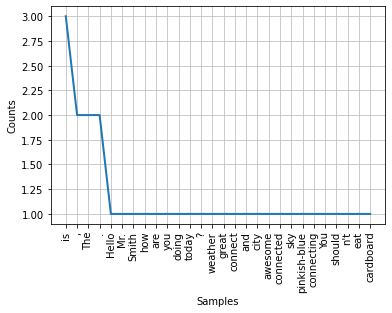

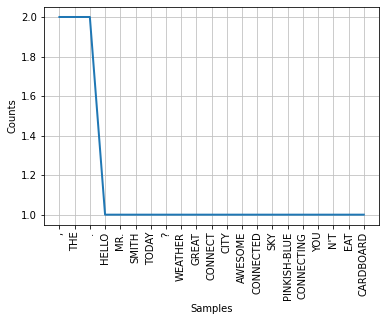

Filtered Sentence: ['HELLO', 'MR.', 'SMITH', ',', 'TODAY', '?', 'THE', 'WEATHER', 'GREAT', 'CONNECT', ',', 'CITY', 'AWESOME', 'CONNECTED', '.', 'THE', 'SKY', 'PINKISH-BLUE', 'CONNECTING', '.', 'YOU', "N'T", 'EAT', 'CARDBOARD']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', 'connect', ',', 'citi', 'awesom', 'connect', '.', 'the', 'ski', 'pinkish-blu', 'connect', '.', 'you', "n't", 'eat', 'cardboard']


In [862]:
# install nltk: pip install nltk

import nltk
#nltk.download('punkt') #do this once only

text="""Hello Mr. Smith, how are you doing today? The weather is great connect, and city is awesome connected.
The sky is pinkish-blue connecting. You shouldn't eat cardboard"""

#text=contacts['AllColumns'] #convert to string

#f = open("D:/Temp/demofile.txt", "r")
#text=f.read()


from nltk.tokenize import sent_tokenize
tokenized_sent=sent_tokenize(text) #Sentence tokenizer breaks text paragraph into sentences
tokenized_sent #['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)#Word tokenizer breaks text paragraph into words.
tokenized_word #['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
fdist #FreqDist({'is': 3, ',': 2, 'The': 2, '.': 2, 'Hello': 1, 'Mr.': 1, 'Smith': 1, 'how': 1, 'are': 1, 'you': 1, ...})

fdist.most_common(2) #[('is', 3), (',', 2)]

# Frequency Distribution Plot
#import matplotlib.pyplot as plt
#fdist.plot(30,cumulative=False)
#plt.show()

def myPlot(myDist):
    import matplotlib.pyplot as plt
    myDist.plot(30,cumulative=False)
    plt.show()    

myPlot(fdist)

#Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.
#from nltk.corpus import stopwords #run only once

#nltk.download('stopwords') #run only once
stop_words=set(stopwords.words("english"))
stop_words


#removing stopwords
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w.upper()) #convert to uppercase

freqFilteredWord = FreqDist(filtered_word)
        
myPlot(freqFilteredWord)

#print("Tokenized Word:",tokenized_word)
#print("Filterd Word:",filtered_word)


#Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

# Stemming: Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".
from nltk.stem import PorterStemmer
#from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_word)
print("Stemmed Sentence:",stemmed_words)



#freqFilteredWord

# <font color=blue><b>Lesson 20: Crosstab and Pivot</b></font>

In [974]:
contacts['Distance'] = contacts['Site'].apply(lambda x: 110 if x=='Mulago' else 220)
contacts.head()

,Staff Name,Department,Section,Site,Project Name,Site_New,Distance
0,Akampulira Andrew,Research,ASTRO/D4T,Mulago,NaN,MUL,110
1,Ahimbisibwe Cynthia,Research,ASTRO/D4T,Mulago,NaN,MUL,110
2,Ndyetukira Jane,Research,ASTRO/D4T,Mulago,NaN,MUL,110
3,Kiiza Taddeo,Research,ASTRO/D4T,Mulago,NaN,MUL,110
4,Nakijoba Ritah,Research,SOUTH/RHINOS,Mulago,NaN,MUL,110


In [985]:
ctab = pd.crosstab(contacts['Department'], contacts['Site'])
ctab.T #T for Transpose
ctab.apply(lambda r: (r/len(contacts))*100, axis=1) #percentages
ctab.T #T for Transpose

Department,ED's Office,Finance and Admin,GHS Project,IDI Core Lab,Information Services,Outreach,PCT,Professor in Residence,Research,SPDT,Training,Ugandan Academy,Z-Other
Site,,,,,,,,,,,,,
MKC,10,86,20,0,17,63,2,0,10,24,24,24,3
Mulago,0,8,2,26,7,3,83,1,98,0,0,1,3


In [989]:
pd.pivot_table(contacts, index=['Site', 'Department'], values='Distance', aggfunc=['mean', 'median', 'sum'])

mean   median      sum
                              Distance Distance Distance
Site   Department                                       
MKC    ED's Office                 220      220     2200
       Finance and Admin           220      220    18920
       GHS Project                 220      220     4400
       Information Services        220      220     3740
       Outreach                    220      220    13860
       PCT                         220      220      440
       Research                    220      220     2200
       SPDT                        220      220     5280
       Training                    220      220     5280
       Ugandan Academy             220      220     5280
       Z-Other                     220      220      660
Mulago Finance and Admin           110      110      880
       GHS Project                 110      110      220
       IDI Core Lab                110      110     2860
       Information Services        110      110      770
       Outreach                    110      110      330
       PCT                         110      110     9130
       Professor in Residence      110      110      110
       Research                    110      110    10780
       Ugandan Academy             110      110      110
       Z-Other                     110      110      330

In [998]:
pd.pivot_table(contacts, index='Site', columns=['Department', 'Section'], values='Distance', aggfunc='mean')

Department ED's Office Finance and Admin                            \
Section    ED's Office        Facilities Finance     HR Operations   
Site                                                                 
MKC              220.0               NaN   220.0  220.0      220.0   
Mulago             NaN             110.0     NaN    NaN      110.0   

Department                            GHS Project         ...   Research  \
Section    Procurement Z-Other     \N GHS Project Stores  ...      TBDRC   
Site                                                      ...              
MKC              220.0   220.0  220.0       220.0  220.0  ...      220.0   
Mulago             NaN     NaN    NaN       110.0    NaN  ...      110.0   

Department          SPDT Training                     Ugandan Academy  \
Section        \N   SPDT     ATIC Operations Training Ugandan Academy   
Site                                                                    
MKC           NaN  220.0    220.0      220.0    220.0           220.0   
Mulago      110.0    NaN      NaN        NaN      NaN           110.0   

Department    Z-Other                 
Section    Facilities Z-Other     \N  
Site                                  
MKC               NaN   220.0    NaN  
Mulago          110.0     NaN  110.0  

[2 rows x 54 columns]